# Dérivation et intégration numérique

Les méthodes de dérivation et d'intégration numérique sont basées sur la définition même de ces concepts mais sans le passage à la limite.

## Dérivation numérique.

### Principe
> Rappel : Soit une fonction $f$ définie et dérivable en $x_0$. Le nombre dérivée de $f$ en $x_0$ est:
> 
> $$ f'(x_0) = \lim_{h \to 0} \frac{f(x_0 + h) - f(x_0)}{h}$$

L'idée de la dérivation numérique est d'approcher le nombre de dérivée $f'(x_0)$ par le calcul du taux de variation précédent pour un un $h$ non nul (on approxime donc géométriquement la tangente par la corde):

$$ f'(x_0) \approx \frac{f(x_0 + h) - f(x_0)}{h}$$

### Type de calcul
On distingue trois façon de calcul un nombre dérivé:

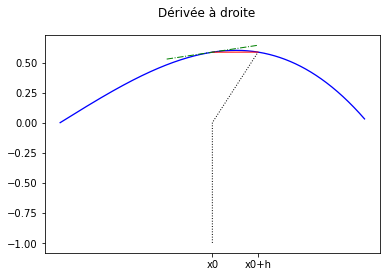

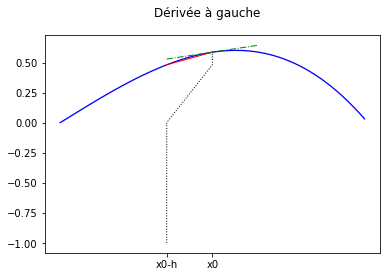

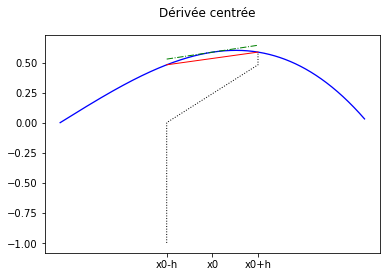

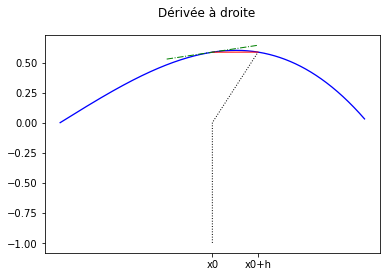

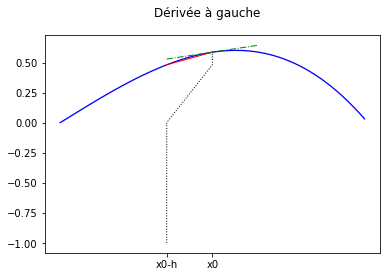

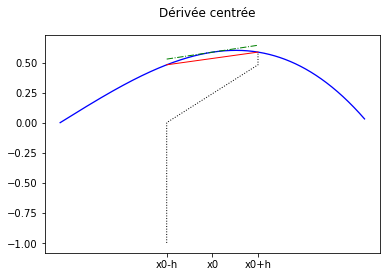

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue


def f1(x):
  return np.sin(x) - x ** 3 / 4


def df1(x):
  return (np.sqrt(2) / 2 - 3 / 4 ** 3 * np.pi ** 2) * (x - np.pi / 4) + f1(np.pi / 4)

x = np.linspace(0, np.pi / 2, 1000)
y = f1(x)

Kd = 1.3
Kg = 2 - Kd

xd = np.array([np.pi / 4, np.pi / 4 * Kd])
xd2 = np.array([np.pi / 4, np.pi / 4, np.pi / 4 * Kd, np.pi / 4 * Kd])
yd = f1(xd)
yd2 = np.insert(np.insert(yd, 0, 0), 0, -1)

xg = np.array([np.pi / 4 * Kg, np.pi / 4])
xg2 = np.array([np.pi / 4 * Kg, np.pi / 4 * Kg, np.pi / 4, np.pi / 4])
yg = f1(xg)
yg2 = np.insert(np.insert(yg, 0, 0), 0, -1)

xc = np.array([np.pi / 4 * Kg, np.pi / 4 * Kd])
xc2 = np.array([np.pi / 4 * Kg, np.pi / 4 * Kg, np.pi / 4 * Kd, np.pi / 4 * Kd])
xc3 = [np.pi / 4 * Kg, np.pi / 4, np.pi / 4 * Kd]
yc = f1(xc)
yc2 = np.insert(np.insert(yc, 0, 0), 0, -1)
dyd = df1(xc)

f, ax = plt.subplots()
f.suptitle("Dérivée à droite")
ax.plot(x, y, linewidth=1.3, color="blue")
ax.plot(xd2, yd2, linestyle=':', linewidth=1, color="black")
ax.plot(xd, yd, linewidth=1, color="red", label="Dérivée numérique")
ax.plot(xc, dyd, linewidth=1, linestyle='-.', color="green", label="Dérivée réelle")
ax.set_xticks(xd)
ax.set_xticklabels(["x0", "x0+h"])
glue("deriv_d", f, display="False")

f, ax = plt.subplots()
f.suptitle("Dérivée à gauche")
ax.plot(x, y, linewidth=1.3, color="blue")
ax.plot(xg2, yg2, linestyle=':', linewidth=1, color="black")
ax.plot(xg, yg, linewidth=1, color="red", label="Dérivée numérique")
ax.plot(xc, dyd, linewidth=1, linestyle='-.', color="green", label="Dérivée réelle")
ax.set_xticks(xg)
ax.set_xticklabels(["x0-h", "x0"])
glue("deriv_g", f, display="False")

f, ax = plt.subplots()
f.suptitle("Dérivée centrée")
ax.plot(x, y, linewidth=1.3, color="blue")
ax.plot(xc2, yc2, linestyle=':', linewidth=1, color="black")
ax.plot(xc,yc, linewidth=1, color="red", label="Dérivée numérique")
ax.plot(xc, dyd, linewidth=1, linestyle='-.', color="green", label="Dérivée réelle")
ax.set_xticks(xc3)
ax.set_xticklabels(["x0-h", "x0", "x0+h"])
glue("deriv_c", f, display="False")

````{tabbed} Dérivée à droite

$$ f'(x_0) \approx \frac{f(x_0 + h) - f(x_0)}{h}$$
```{glue:figure} deriv_d
:align: center
```
````

````{tabbed} Dérivée à gauche

$$ f'(x_0) \approx \frac{f(x_0) - f(x_0 - h)}{h}$$
```{glue:figure} deriv_g
:align: center
```
````

````{tabbed} Dérivée centrée

$$ f'(x_0) \approx \frac{f(x_0 + h) - f(x_0 - h)}{2h}$$
```{glue:figure} deriv_c
:align: center
```
````